# Heart Failure Prediction
#### Using Kaggle data to create a model for predicting mortality caused by Heart Failure.
Creating a neural network (ANN) and comparing it to baseline models (SVM, kNN, LogisticRegression, Naive-Baines)

Performance metrics: accuracy, precision, recall, F1-score, ROC curve, AUC

In [45]:
# import modules
## standard modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## modelling
### baseline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### artificial neural network (ANN)
from keras.layers import Dense, Dropout
from keras.models import Sequential

## performance metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve 

## Importing data and preprocessing

Data split and scaling

In [2]:
# import data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
described = df.describe().drop(axis=0, index=["std","25%","50%","75%"])
described

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.41806,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.26087,0.32107
min,40.000000,0.000000,23.000000,0.00000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.00000,0.00000
max,95.000000,1.000000,7861.000000,1.00000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.00000,1.00000


We can note the dataset has 12 features contributing to the DEATH_EVENT. No columns are dropped.

In [3]:
# pre-processing
X = df.iloc[:,:-1].values
y = df.DEATH_EVENT.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [4]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
threshold = y_train.mean()
threshold

0.3179916317991632

## Neural Network

### Modelling

In [34]:
# initialise
ann = Sequential()

# input layer
ann.add(Dense(units=16, kernel_initializer="uniform", activation="relu", input_dim=12))

# hidden layers w/ regularisation
ann.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))
ann.add(Dropout(0.25))
ann.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))
ann.add(Dropout(0.5))

# output layer
ann.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid")) # units = 1 because this is binary classification (0 or 1)

# compile the network
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# save model
ann.save("ann_model")


INFO:tensorflow:Assets written to: ann_model\assets


INFO:tensorflow:Assets written to: ann_model\assets


In [35]:
# train the ANN
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.25)

Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 0.6928 - accuracy: 0.6201 - val_loss: 0.6920 - val_accuracy: 0.7000
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6917 - accuracy: 0.6760 - val_loss: 0.6908 - val_accuracy: 0.7000
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.6760 - val_loss: 0.6896 - val_accuracy: 0.7000
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.6760 - val_loss: 0.6884 - val_accuracy: 0.7000
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.6760 - val_loss: 0.6871 - val_accuracy: 0.7000
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6872 - accuracy: 0.6760 - val_loss: 0.6858 - val_accuracy: 0.7000
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6863 - accuracy: 0.6760 - val_loss: 0.6844 - val_accuracy: 0.7000
Epoch 8/100
6/6 [=========

In [36]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('validation_accuracy is', val_accuracy*100))


validation_accuracy is: 77.75%


In [37]:
# predictions
ann_pred = ann.predict(X_test)
ann_pred = np.where(ann_pred>threshold, 1, 0)

2/2 [==============================] - 0s 3ms/step


### Performance

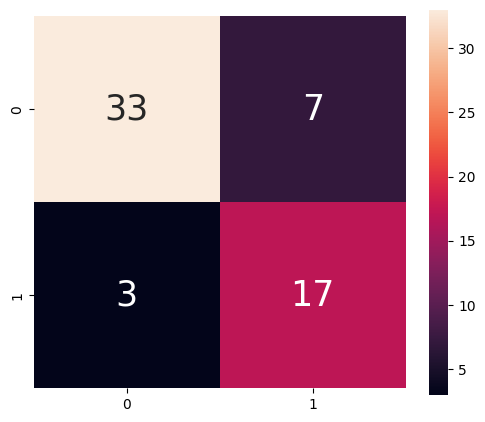

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.71      0.85      0.77        20

    accuracy                           0.83        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.85      0.83      0.84        60



In [39]:
# Getting the confusion matrix
plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, ann_pred)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True)
plt.show()

print(classification_report(y_test,ann_pred))

The artificial neural network (ANN) predicted 36 survivals and 24 deaths.

There were 10 incorrect classifications (3 false survivals, 7 false-deaths)

## Baseline

### Logistic Regression

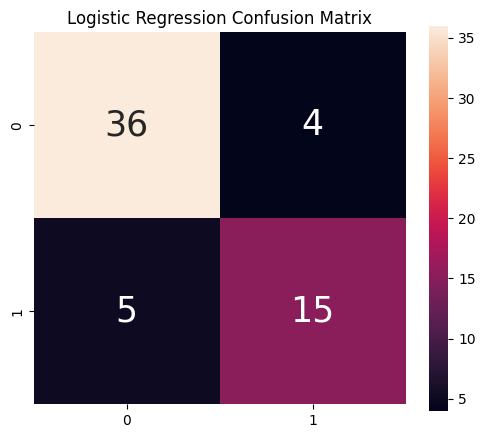

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.79      0.75      0.77        20

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



In [41]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, LR_pred)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print(classification_report(y_test,LR_pred))

### kNN

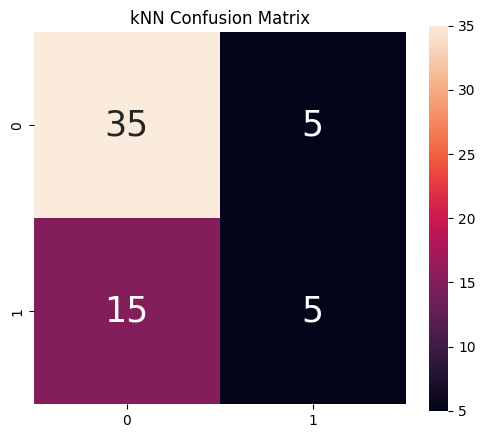

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        40
           1       0.50      0.25      0.33        20

    accuracy                           0.67        60
   macro avg       0.60      0.56      0.56        60
weighted avg       0.63      0.67      0.63        60



In [42]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
kNN_pred = kNN.predict(X_test)

plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, kNN_pred)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True)
plt.title("kNN Confusion Matrix")
plt.show()

print(classification_report(y_test,kNN_pred))

### Naive-Baines

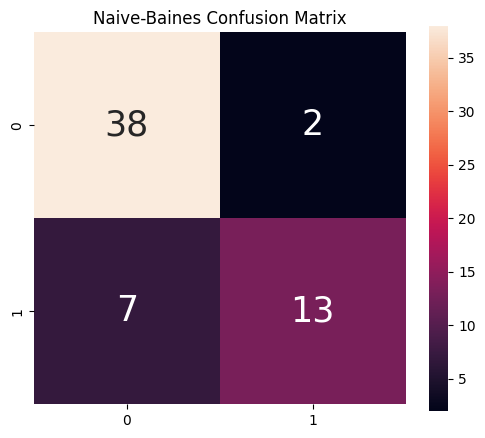

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        40
           1       0.87      0.65      0.74        20

    accuracy                           0.85        60
   macro avg       0.86      0.80      0.82        60
weighted avg       0.85      0.85      0.84        60



In [14]:
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, NB_pred)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True)
plt.title("Naive-Baines Confusion Matrix")
plt.show()

print(classification_report(y_test,NB_pred))

### Support Vector Machine (SVM)

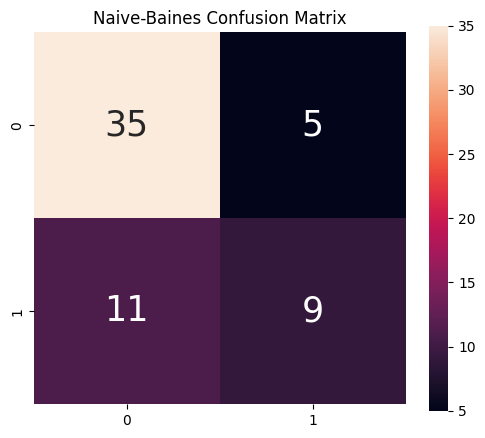

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        40
           1       0.64      0.45      0.53        20

    accuracy                           0.73        60
   macro avg       0.70      0.66      0.67        60
weighted avg       0.72      0.73      0.72        60



In [44]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, SVM_pred)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True)
plt.title("Naive-Baines Confusion Matrix")
plt.show()

print(classification_report(y_test,SVM_pred))